# Basic operations on raster data

based on rasterio
goals of the tutorial

- manage raster data
- manipulate raster with vector data

based on the open data of:
- [orthophotos](https://www.comune.trento.it/Aree-tematiche/Cartografia/Download/Ortofoto-2019) of Municipality of Trento 
- [DTM](http://www.territorio.provincia.tn.it/portal/server.pt/community/lidar/847/lidar/23954) - Autonomous Province of Trento

requirements
- python knowledge
- geopandas

status<br/>
*the world in a matrix*

# Introduction

![](https://raw.githubusercontent.com/napo/geospatial_course_unitn/master/images/data_models_slide.jpg)

small summary:
view the [slides](https://docs.google.com/presentation/d/e/2PACX-1vT_my7vYOE2_xOdD-eZOtjxEFrbi1BfMcx_84jwomsVgI5wOfPxBO6sPNhxPtaLuEhrrkxmPbiv5Na0/pub?start=false&loop=false&delayms=3000) from the page 11 until 19


<img src="https://www.earthdatascience.org/images/earth-analytics/raster-data/raster-concept.png" width="640px" />



# Data resources
you can find data on all geospatial infrastructures through various protocols<Br/>
Here you will find the most popular resources
## DEM 
- [TiniTtaly DEM](https://tinitaly.pi.ingv.it/)
- [SRTM](https://www2.jpl.nasa.gov/srtm/) - [download](https://dwtkns.com/srtm30m/)
- [ASTER Global Digital Elevation](https://asterweb.jpl.nasa.gov/gdem.asp)
## Satellite Images
- [Copernicus](https://scihub.copernicus.eu/)
- [Planet](https://www.planet.com/) (no opendata)
- [Maxar](https://www.maxar.com/) (no opendata)
# Setup

In [ ]:
try:
  import geopandas as gpd
except ModuleNotFoundError as e:
  !pip install geopandas==0.12.1
  import geopandas as gpd

if gpd.__version__ != "0.12.1":
  !pip install -U geopandas==0.12.1
  import geopandas as gpd

In [2]:
try:
  import rasterio as rio
except ModuleNotFoundError as e:
  !pip install rasterio==1.3.4
  import rasterio as rio

if rio.__version__ != "1.3.4":
  !pip install -U rasterio==1.3.4
  import rasterio as rio

In [3]:
try:
  import owslib
except ModuleNotFoundError as e:
  !pip install owslib==0.25.0
  import owslib

if owslib.__version__ != "0.25.0":
  !pip install -U owslib==0.25.0
  import owslib

In [4]:
import warnings
warnings.simplefilter("ignore")
import matplotlib.pyplot as plt

# Data

Orthophoto of Trento 2019

https://www.comune.trento.it/Aree-tematiche/Cartografia/Download/Ortofoto-2019

- data acquisition: 3th October 2019
- scale 1:2.000
- resolution 1px = 10cm
- [tiff file](https://webapps.comune.trento.it/gis/raster/ortofoto_2019.tif) size 3,5Gb
- crs ETRS89 / UTM zone 32N - EPSG:[25832](https://epsg.io/25832)
- [tfw file](https://webapps.comune.trento.it/gis/raster/ortofoto_2019.tfw)

![](https://raw.githubusercontent.com/napo/geospatial_course_unitn/master/images/orthophoto_trento.png)




... file too big for our purpose

The municipality of Trento [offers](https://www.comune.trento.it/Aree-tematiche/Cartografia/Servizi-WMS-e-WFS) also a WMS service

Please check the lesson "[Retrieving data from spatial database infrastructures](https://napo.github.io/geospatial_course_unitn/lessons/retrieving_data_from_sdi)" 

![](https://raw.githubusercontent.com/napo/geospatial_course_unitn/master/images/ogc_services.png)

The end point of the WMS is http://webapps.comune.trento.it/ogc

---



In [5]:
from owslib.wms import WebMapService

In [6]:
wms_trento = "http://webapps.comune.trento.it/ogc"
wms = WebMapService(wms_trento)

In [7]:
list(wms.contents)

['ogc_services',
 'ortofoto2009',
 'ortofoto2015',
 'ortofoto2016',
 'ortofoto2019',
 'ortofoto2015aldeno',
 'ortofoto2016infrarosso',
 'ortofoto2019infrarosso',
 'ct2000',
 'ct2000_colori',
 'carta_semplificata',
 'ombreDTM',
 'ombreDSM',
 'toponomastica',
 'grafo',
 'civici',
 'civici_principali',
 'toponimi',
 'prg_vigente',
 'pric']

In [8]:
wms['ortofoto2019'].crsOptions

['EPSG:4326', 'EPSG:3857', 'EPSG:25832']

In [9]:
wms['ortofoto2019'].boundingBox

(637271.0, 5083800.0, 684982.0, 5119620.0, 'EPSG:25832')

In [10]:
request = wms.getmap(
    layers=['ortofoto2019'],
    srs='EPSG:25832',
    format='image/jpeg',
    bbox=(648300.0, 5090700.0, 677500.0, 5116000.0),
    size=(833,606)
    )

In [11]:
from rasterio import MemoryFile
from rasterio.plot import show


In [12]:
image = MemoryFile(request).open()

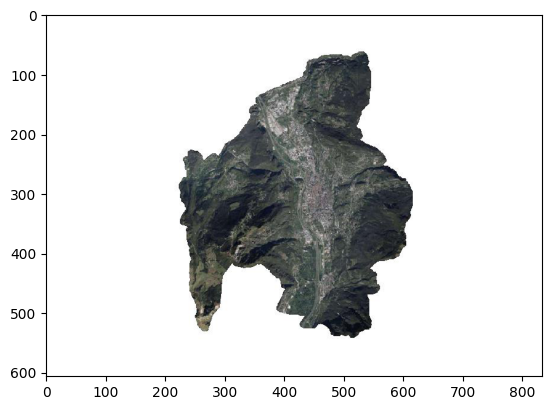

In [13]:
show(image)
plt.show()

## Manage a raster

Here you can find a cutted version of the geotiff of the muncipality of Trento around the scientific hub area in Povo - Trento

(where the lessons of this course are held)

- [ortophoto](https://github.com/napo/geospatial_course_unitn/raw/master/data/raster/trento_scientifc_hub_povo.tif)
- [dtm](https://github.com/napo/geospatial_course_unitn/raw/master/data/raster/trento_scientifc_hub_povo_dtm.tif)

---


## investigate an orthophoto

In [14]:
import urllib.request
url_download_orthophoto_scientific_hub_povo = 'https://github.com/napo/geospatial_course_unitn/raw/master/data/raster/trento_scientifc_hub_povo.tif'
file_scientific_hub_povo = "trento_scientifc_hub_povo.tif"
urllib.request.urlretrieve(url_download_orthophoto_scientific_hub_povo ,file_scientific_hub_povo) 

('trento_scientifc_hub_povo.tif', <http.client.HTTPMessage at 0x7f8fe2516740>)

In [15]:
raster = rio.open(file_scientific_hub_povo)

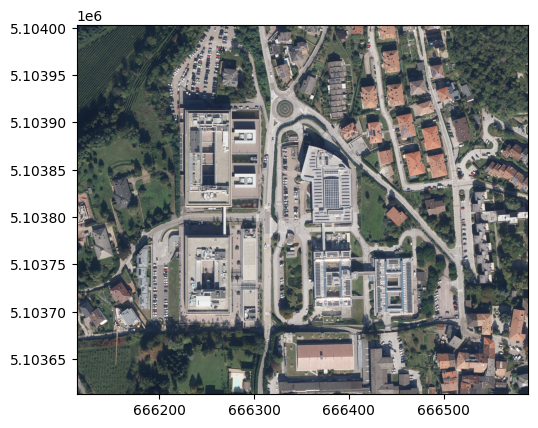

<AxesSubplot:>

In [16]:
show(raster)

dimension of the image in pixel

In [17]:
raster.width

4761

In [18]:
raster.height

3900

In [19]:
raster.crs

CRS.from_epsg(25832)

In [20]:
raster.res

(0.09999999999999999, 0.09999999999999999)

In [21]:
raster.bounds

BoundingBox(left=666113.0, bottom=5103613.0, right=666589.1, top=5104003.0)

In [22]:
raster.meta

{'driver': 'GTiff',
 'dtype': 'uint8',
 'nodata': None,
 'width': 4761,
 'height': 3900,
 'count': 3,
 'crs': CRS.from_epsg(25832),
 'transform': Affine(0.09999999999999999, 0.0, 666113.0,
        0.0, -0.09999999999999999, 5104003.0)}

In [23]:
raster.count

3

In [24]:
raster.indexes # the values start from 1 !

(1, 2, 3)

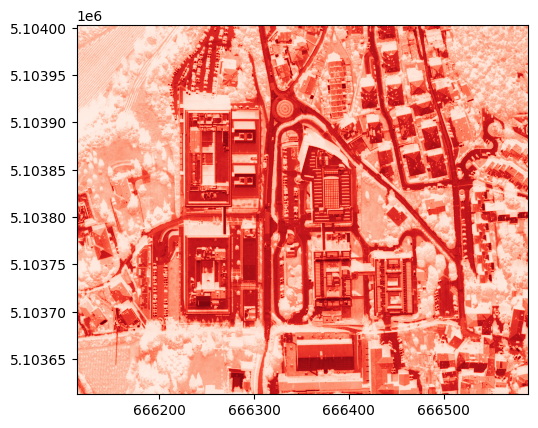

<AxesSubplot:>

In [25]:
show((raster, 1), cmap='Reds')

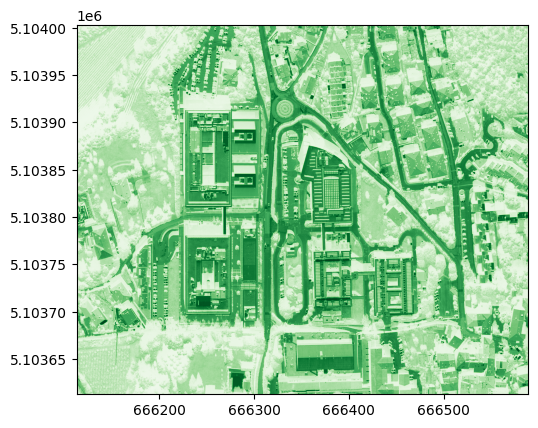

<AxesSubplot:>

In [26]:
show((raster, 2), cmap='Greens')

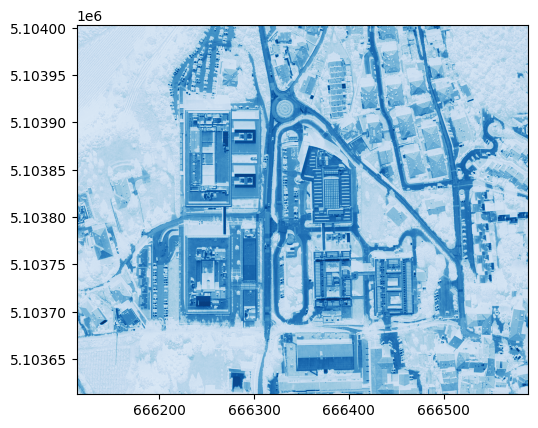

<AxesSubplot:>

In [27]:
show((raster, 3), cmap='Blues')

In [28]:
raster.colorinterp[0]

<ColorInterp.red: 3>

In [29]:
from rasterio.plot import show_hist

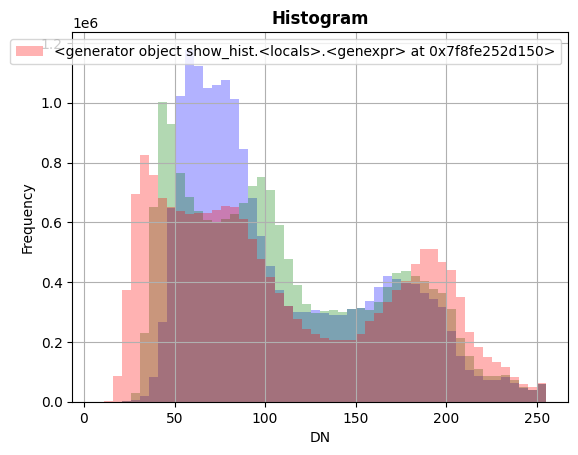

In [30]:
show_hist(raster, bins=50, lw=0.0, stacked=False, alpha=0.3,histtype='stepfilled', title="Histogram")

## investigate an DTM file

In [31]:
url_download_dtm_scientific_hub_povo = 'https://github.com/napo/geospatial_course_unitn/raw/master/data/raster/trento_scientifc_hub_povo_dtm.asc'
dtm = "trento_scientifc_hub_povo_dtm.asc"
urllib.request.urlretrieve(url_download_dtm_scientific_hub_povo ,dtm) 

('trento_scientifc_hub_povo_dtm.asc',
 <http.client.HTTPMessage at 0x7f8fe48764d0>)

In [32]:
url_download_dtm_scientific_hub_povo_prj = 'https://github.com/napo/geospatial_course_unitn/raw/master/data/raster/trento_scientifc_hub_povo_dtm.prj'
dtm_prj = "trento_scientifc_hub_povo_dtm.prj"
urllib.request.urlretrieve(url_download_dtm_scientific_hub_povo_prj ,dtm_prj) 

('trento_scientifc_hub_povo_dtm.prj',
 <http.client.HTTPMessage at 0x7f8fe4822140>)

In [33]:
dtm = "trento_scientifc_hub_povo_dtm.asc"

In [34]:
raster_dtm = rio.open(dtm)

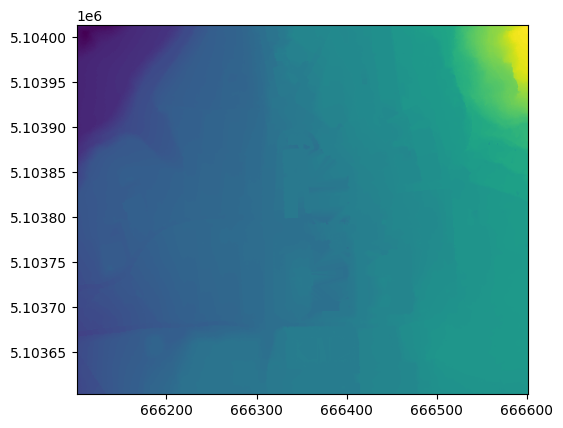

<AxesSubplot:>

In [35]:
show(raster_dtm)

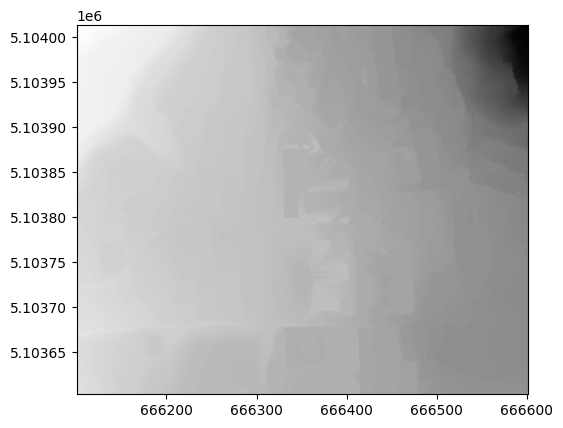

<AxesSubplot:>

In [36]:
show(raster_dtm,cmap="Greys")

In [37]:
raster_dtm.crs

CRS.from_epsg(25832)

In [38]:
raster_dtm.meta

{'driver': 'AAIGrid',
 'dtype': 'float32',
 'nodata': None,
 'width': 500,
 'height': 410,
 'count': 1,
 'crs': CRS.from_epsg(25832),
 'transform': Affine(1.0, 0.0, 666100.6735466761,
        0.0, -1.0, 5104013.23583161)}

In [39]:
raster_dtm.res

(1.0, 1.0)

In [40]:
raster_dtm.count

1

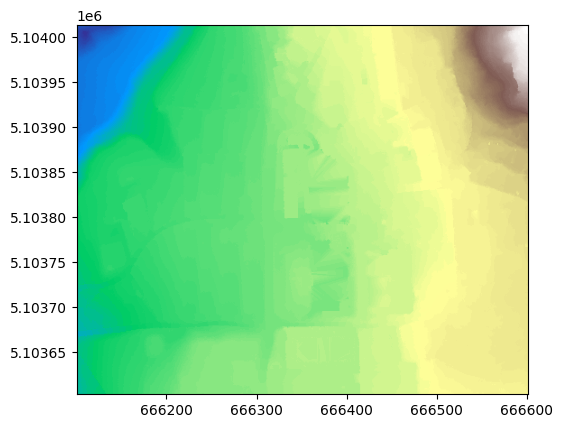

<AxesSubplot:>

In [41]:
show(raster_dtm, cmap='terrain')

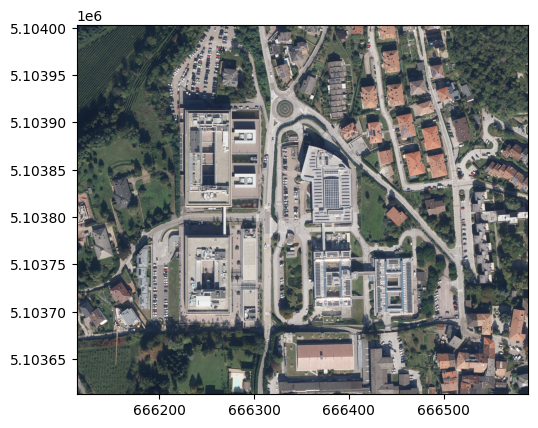

<AxesSubplot:>

In [42]:
show(raster)

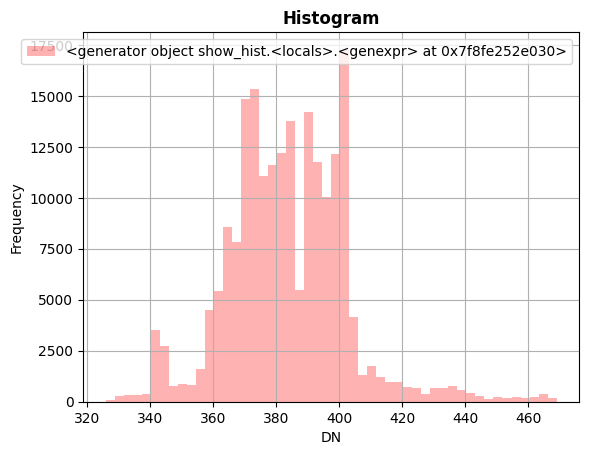

In [43]:
show_hist(raster_dtm, bins=50, lw=0.0, stacked=False, alpha=0.3,histtype='stepfilled', title="Histogram")

In [44]:
data = raster_dtm.read(1)

In [45]:
type(data)

numpy.ndarray

Which altitude is?

<img src="https://raw.githubusercontent.com/napo/geospatial_course_unitn/master/images/trento_scientific_hub_3d.jpg" width="640px" />

<br/>
this image is generated with QGIS and the plugin qgis2threejs



In [46]:
data.mean()

383.85464

In [47]:
data.min()

326.0

In [48]:
data.max()

469.0

## find the value on a given point

Example:<br/>
the position of "Via Sommarive 18, Trento" (the address of FBK)

In [49]:
import shapely
import pyproj
from geopy.geocoders import Nominatim
from shapely.ops import transform

... identify the point wiht a geocoder

In [50]:
geolocator = Nominatim(user_agent="geospatial course")
location = geolocator.geocode("Via Sommarive 18, Trento")

In [51]:
x = location.longitude
y = location.latitude

In [52]:
y

46.06692965

transform the coordinate from EPSG 4326 to 25832

In [53]:
wgs84 = pyproj.CRS('EPSG:4326')
crs_dtm = pyproj.CRS('EPSG:25832')
projection_transform = pyproj.Transformer.from_crs(wgs84, crs_dtm, always_xy=False).transform

In [54]:
point_location = shapely.geometry.Point(y,x)

In [55]:
point_location_crs_dtm = transform(projection_transform,point_location)

In [56]:
x = point_location_crs_dtm.x
y = point_location_crs_dtm.y

In [57]:
y

5103733.953099297

In [58]:
row,col = rio.transform.rowcol(raster_dtm.transform,(x),(y))

In [59]:
col

282

Identify the value

In [60]:
data[row][col]

381.0

## Resampling

Downsampling to 1/5 of the resolution can be done withupscale_factor = 1/5

In [61]:
raster_dtm.profile

{'driver': 'AAIGrid', 'dtype': 'float32', 'nodata': None, 'width': 500, 'height': 410, 'count': 1, 'crs': CRS.from_epsg(25832), 'transform': Affine(1.0, 0.0, 666100.6735466761,
       0.0, -1.0, 5104013.23583161), 'blockysize': 1, 'tiled': False}

In [62]:
from rasterio.enums import Resampling

upscale_factor = 1/5

# resample data to target shape
data_s = raster_dtm.read(
        out_shape=(
            raster_dtm.count,
            int(raster_dtm.width * upscale_factor),
            int(raster_dtm.height * upscale_factor)
        ),
        resampling=Resampling.bilinear
    )
profile =raster_dtm.profile
profile.update(dtype=rio.uint8, count=1, compress='lzw')

with rio.open('resampled_area.tif', 'w', **profile) as dst:
  dst.write(data_s.astype(rio.uint8))

Warning 6: driver AAIGrid does not support creation option BLOCKYSIZE
Warning 6: driver AAIGrid does not support creation option TILED
Warning 6: driver AAIGrid does not support creation option COMPRESS


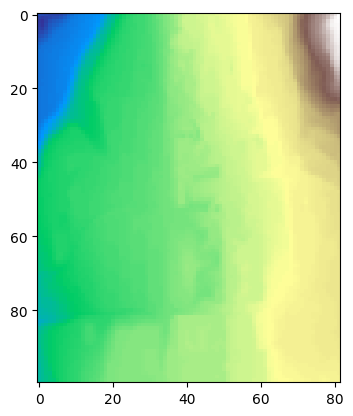

<AxesSubplot:>

In [63]:
show(data_s, cmap='terrain')

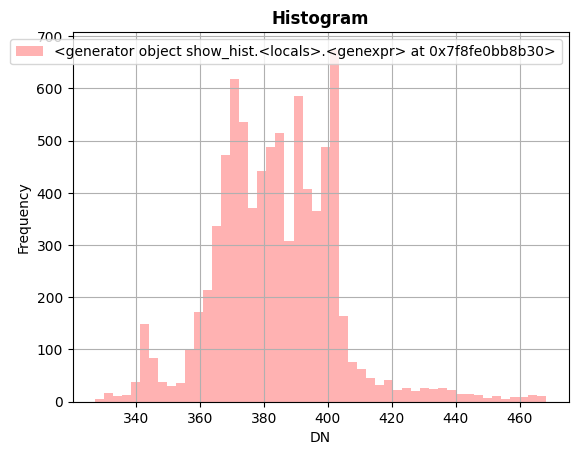

In [64]:
show_hist(data_s, bins=50, lw=0.0, stacked=False, alpha=0.3,histtype='stepfilled', title="Histogram")

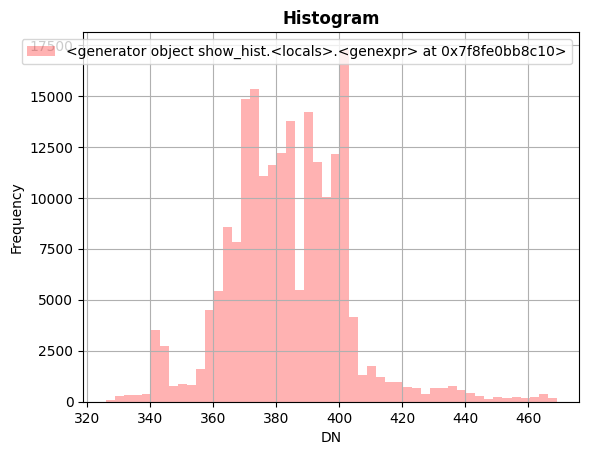

In [65]:
show_hist(raster_dtm, bins=50, lw=0.0, stacked=False, alpha=0.3,histtype='stepfilled', title="Histogram")

# Masking / clipping raster

One common task in raster processing is to clip raster files based on a Polygon

We start to extract the polygon of the area held by Bruno Kessler Foundation (research center in front of the university)



![](https://raw.githubusercontent.com/napo/geospatial_course_unitn/master/images/fbk_overpassturbo.png)

[query with overpass-turbo](http://overpass-turbo.eu/s/Zw8)

[geojson exported](https://raw.githubusercontent.com/napo/geospatial_course_unitn/master/data/openstreetmap/boundary_fbk_povo.geojson
)



In [66]:
import geopandas as gpd

In [67]:
fbk = gpd.read_file("https://raw.githubusercontent.com/napo/geospatial_course_unitn/master/data/openstreetmap/boundary_fbk_povo.geojson")

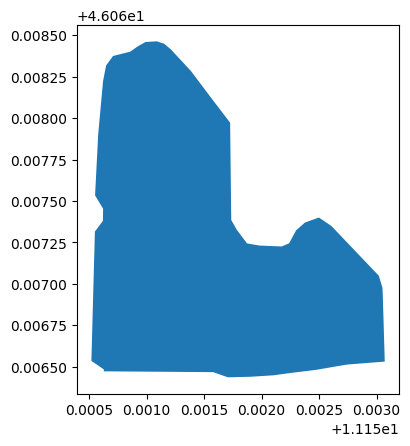

In [68]:
fbk.plot()
plt.show()

In [69]:
fbk

,id,@id,addr:city,addr:housenumber,addr:postcode,addr:street,amenity,name,website,geometry
0,way/813142998,way/813142998,Povo,18,38123,Via Sommarive,research_institute,Fondazione Bruno Kessler,https://www.fbk.eu/,"POLYGON ((11.15071 46.06837, 11.15065 46.06832..."


In [70]:
def getFeatures(gdf):
    """Function to parse features from GeoDataFrame in such a manner that rasterio wants them"""
    import json
    return [json.loads(gdf.to_json())['features'][0]['geometry']]

In [71]:
coords = getFeatures(fbk.to_crs(epsg=25832))

In [72]:
coords

[{'type': 'Polygon',
  'coordinates': [[[666327.6121890642, 5103893.127195438],
    [666323.144271185, 5103886.635365136],
    [666321.3931118533, 5103876.125343578],
    [666319.0792195683, 5103840.3496225],
    [666318.0826114198, 5103799.36152162],
    [666323.7228536663, 5103790.552413938],
    [666323.8345305179, 5103782.416574045],
    [666318.6225224709, 5103775.104085964],
    [666318.6091393529, 5103688.31146606],
    [666327.0838932644, 5103682.87013375],
    [666327.1737856156, 5103681.549444295],
    [666400.6669444224, 5103682.9926035525],
    [666410.7295525032, 5103679.7958390545],
    [666425.792733877, 5103680.570343598],
    [666441.5815165223, 5103681.987167167],
    [666451.6897212835, 5103683.683917669],
    [666470.004685441, 5103686.414475457],
    [666490.3886287892, 5103690.4797439],
    [666515.9557992362, 5103693.195510002],
    [666513.463898501, 5103736.924514817],
    [666513.0686339957, 5103742.662169834],
    [666510.3745651151, 5103750.69474607],
    [6

In [73]:
from rasterio.mask import mask

In [74]:
out_img, out_transform = mask(raster, coords, crop=True)

In [75]:
out_meta = raster.meta

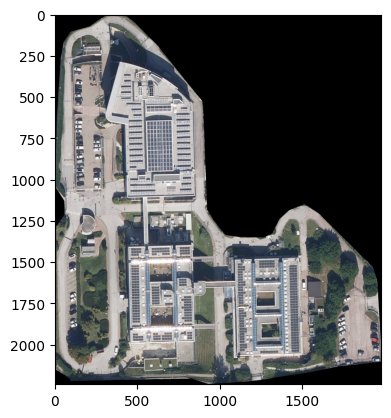

<AxesSubplot:>

In [76]:
show(out_img)

In [77]:
out_meta.update({"driver": "GTiff",
                 "height": out_img.shape[1],
                 "width": out_img.shape[2],
                 "transform": out_transform})

with rio.open("fbk_orthophoto.tif", "w", **out_meta) as dest:
    dest.write(out_img)


## raster to vector

In [78]:
resampled_area = rio.open('resampled_area.tif')

In [79]:
from rasterio.features import shapes
mask = None
image = resampled_area.read(1) # first band
results = (
  {'properties': {'raster_val': v}, 'geometry': s}
  for i, (s, v) 
    in enumerate(
      shapes(image, mask=mask, transform=resampled_area.transform)))

In [80]:
geoms = list(results)
%time

CPU times: user 7 µs, sys: 1 µs, total: 8 µs
Wall time: 15.5 µs


In [81]:
geoms

[{'properties': {'raster_val': 77.0},
  'geometry': {'type': 'Polygon',
   'coordinates': [[(666100.6735466761, 5104013.23583161),
     (666100.6735466761, 5104008.23583161),
     (666107.6735466761, 5104008.23583161),
     (666107.6735466761, 5104013.23583161),
     (666100.6735466761, 5104013.23583161)]]}},
 {'properties': {'raster_val': 76.0},
  'geometry': {'type': 'Polygon',
   'coordinates': [[(666107.6735466761, 5104013.23583161),
     (666107.6735466761, 5104008.23583161),
     (666113.6735466761, 5104008.23583161),
     (666113.6735466761, 5104013.23583161),
     (666107.6735466761, 5104013.23583161)]]}},
 {'properties': {'raster_val': 76.0},
  'geometry': {'type': 'Polygon',
   'coordinates': [[(666137.6735466761, 5104013.23583161),
     (666137.6735466761, 5104008.23583161),
     (666143.6735466761, 5104008.23583161),
     (666143.6735466761, 5104013.23583161),
     (666137.6735466761, 5104013.23583161)]]}},
 {'properties': {'raster_val': 78.0},
  'geometry': {'type': 'Polyg

In [82]:
gpd_polygonized_raster  = gpd.GeoDataFrame.from_features(geoms)
%time

CPU times: user 5 µs, sys: 1 µs, total: 6 µs
Wall time: 11.2 µs


In [83]:
gpd_polygonized_raster.shape

(1330, 2)

In [84]:
gpd_polygonized_raster.geometry.area.max()

5847.0

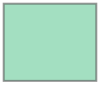

In [85]:
gpd_polygonized_raster.geometry[1]

# Exercises

- clip the area with the shape of Polo Ferrari (in front on FBK)
- create the altitude profile of the street "Via Sommarive"
- find the area FBK in the WMS of municipality of Trento - layer "Carta Tecnica 1:2.000 alta risoluzione" and vectorize it
- identify what is possibile to see from the crossing point between Via Sommarive and Via dei Valoni
